# Poisson statistics and Probability Overview

We will begin today by the concept of probability density functions, or PDFs, which are going to be key in the next parts of the class. There are two types of random variables, continuous and discrete. Discrete random variables can only take on discrete values, whereas continuous random variables can take on continuous values. For a discrete random variables, we define a probability mass function that defines the exact probability that the random variable will take a certain discrete value.

For continuous probability distributions, we have instead a probability density function, or PDF. The PDF $P(x)$ over the random variable $x$ is defined such that the probability that $x$ is between $a$ and $b$  is given by

$$p(a < x < b) = \int_{a}^{b} P(x) dx$$

Where I adopt the convention that lowercase $p$ represent probabilities, and uppercase $P$ denote probability densities. The most common probability distribution is the Gaussian, or normal distribution, which represents many natural phenomena, especially in physics. The normal distribution for a random variable $x_j$ with mean  $\mu_j$ and standard deviation $\sigma_j$ is given by

$$P(x_j) = \frac{1}{\sigma_j\sqrt{2\pi}} \exp(-\frac{1}{2}\frac{(x_j-\mu_j)^2}{\sigma_j^2})$$

Lets use numpy to make some plots of the various Gaussian distributions.

### Exercise 1:

Write code that plots, using matplotlib and numpy, the probability density functions (PDFs) for the following Gaussian distributions over random variable $x$ for $x \in (-5,5)$

1. $\mu=0, \sigma^2 = 0.2$
2. $\mu=0, \sigma^2 = 1.0$
3. $\mu=0, \sigma^2 = 5.0$
4. $\mu=-2, \sigma^2 = 0.5$

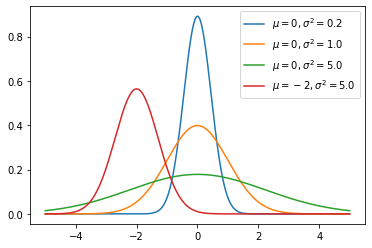

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, 1000) #make a vector of points from -5 to 5 with 1000 data points

gaussmu0sig02 = (1/(np.sqrt(2*np.pi*0.2)))*np.exp(-0.5*x**2.0/0.2)
gaussmu0sig10 = (1/(np.sqrt(2*np.pi*1.0)))*np.exp(-0.5*x**2.0/1.0)
gaussmu0sig50 = (1/(np.sqrt(2*np.pi*5.0)))*np.exp(-0.5*x**2.0/5.0)
gaussmum2sig05 = (1/(np.sqrt(2*np.pi*0.5)))*np.exp(-0.5*(x+2)**2.0/0.5)

plt.plot(x, gaussmu0sig02, label = "$\mu=0, \sigma^2 = 0.2$")
plt.plot(x, gaussmu0sig10, label = "$\mu=0, \sigma^2 = 1.0$")
plt.plot(x, gaussmu0sig50, label = "$\mu=0, \sigma^2 = 5.0$")
plt.plot(x, gaussmum2sig05, label = "$\mu=-2, \sigma^2 = 5.0$")
plt.legend()

We can define joint probability density functions, e.g. $P(x,y)$, for multi-variate probability distributions in a similar way. To find the probability that random variables $x, y$ are in a region $R$, from the joint probability density $P(x,y)$, we have

$p(x, y\in R) = \iint_{R} P(x, y) dx dy$

We define the single variable PDFs $P(x)$ and $P(y)$ by integrating (or marginalizing) the extra variable from the joint PDF, i.e. 

$P(x) = \int_{-\infty}^{\infty} P(x,y) dy$ and $P(y) = \int_{-\infty}^{\infty} P(x,y) dx$

We define the random variables $x$ and $y$ to be independent from one another if the joint PDF factors into the product of the two single-variable PDFs, i.e.

$P(x, y) = P(x) P(y)$

If we have $k$ different independently distributed variables $x_1, x_2, x_3...x_k$, then the joint probability distribution will be given by 

$P(x_1, x_2, ... x_k) = \frac{1}{ (2\pi)^{k/2}\prod_i \sigma_i} \exp(-\frac{1}{2}\sum_i \frac{(x_i- \mu_i)^2}{\sigma_i^2})$
This is the joint PDF for all the variables. Lets visualize a multivariate Gaussian of two random variables.

### Exercise 2:

Write code that plots, using matplotlib and numpy, the probability density functions (PDFs) for a multivariate Gaussian distribution over independent random variables $x$ and $y$ with mean $0$ and variance $1$ for both, over the region $x \in (-5,5), y\in(-5,5)$

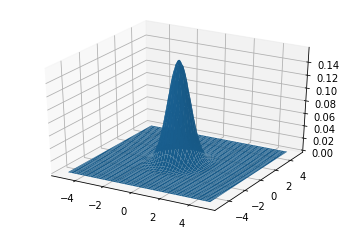

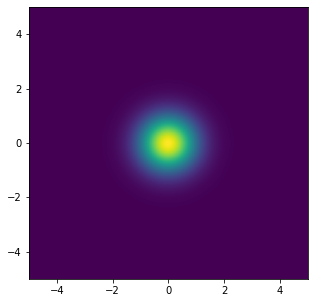

In [2]:
from mpl_toolkits.mplot3d import Axes3D 

fig1 = plt.figure()

ax = fig1.add_subplot(111, projection = '3d')

x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)


x,y = np.meshgrid(x,y)

p = (1/(2*np.pi))*np.exp(-(x**2.0+y**2.0))

ax.plot_surface(x,y,p)
fig2 = plt.figure(figsize = (5,5))
plt.pcolormesh(x,y,p)

Let's see what a Poisson distribution looks like.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
l = [1,5,10,25]
nbin = [6,15,18,25]
hists = {}

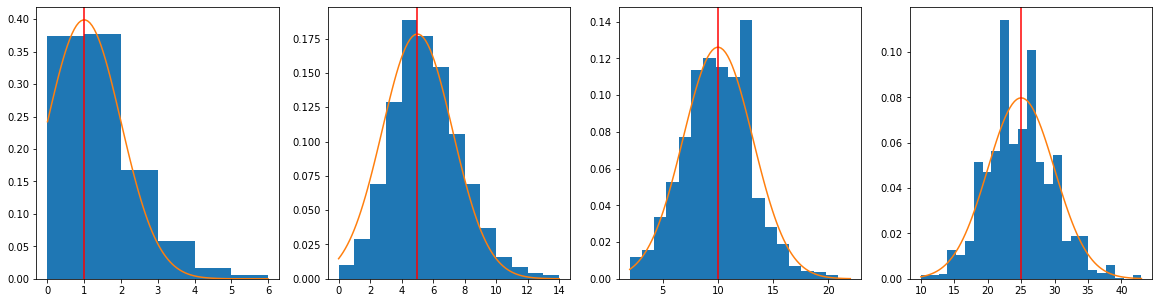

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
for k in range(len(ax)):
    s = np.random.poisson(l[k],1500)
    hists[l[k]]=s
    nbins = min([max(s),nbin[k]])
    ax[k].hist(s,nbins,density=True)
    x = np.linspace(min(s),max(s),100)
    ax[k].plot(x,(1/(np.sqrt(2*np.pi*l[k])))*np.exp(-0.5*(x-l[k])**2.0/l[k]))
    ax[k].axvline(x=l[k],c='r')

What's the expectation value of a Poisson distribution? The variance?

In [6]:
h = hists[25]
print("Mean:",np.mean(h))
print("Variance:",np.var(h))

Mean: 24.784
Variance: 24.212010666666668


Let's simulate a **Poisson process**. 

A Poisson process is defined via a sequence of exponential random variables $\tau_i$, with parameter $\lambda$. The process is defined in terms of $T_n=\sum_{i=1}^n \tau_i$ (the *n-th arrival time*), and $N(s)=\max(n:T_n\leq s)$ (the *number of arrivals*).

Poisson process properties:
- Stochastic (random outcomes according to a distribution)
- Independent increments, so the number of arrivals in different intervals is independent

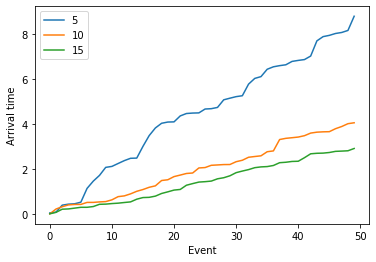

In [110]:
l = [5,10,15]
times = {}
for k in l:
    T = np.random.exponential(scale=1/k,size=50)
    T = np.cumsum(T)
    plt.plot(T,label=k)
    times[k]=T
plt.xlabel('Event')
plt.ylabel('Arrival time')
plt.legend()

In [111]:
np.argmax(times[5]>2)

9

$N(s)$ is a Poisson random variable with parameter $\lambda s$.

Mean: 30.560
Variance: 28.966


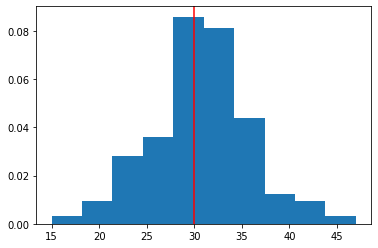

In [112]:
s = 2
l = 15
N = []
for n in range(200):
    T = np.random.exponential(scale=1/l,size=50)
    T = np.cumsum(T)
    N.append(np.argmax(T>s))
plt.hist(N,10,density=True)
plt.axvline(x=l*s,c='r')
print("Mean: {:.3f}".format(np.mean(N)))
print("Variance: {:.3f}".format(np.var(N)))